In [1]:
#dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [5]:
session = Session(engine)

In [6]:
first_meas = session.query(Measurements).first()
first_meas

In [7]:
first_meas.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10c584e48>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [8]:
#Query database for precipitation information for the last 12 months

rain = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= "2016-08-23").\
       group_by(Measurements.date).all()
rain

[('2016-08-23', 0.7),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', None),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.44),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.33),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.05),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.8

In [9]:
#Create a Data Frame using Pandas for the last 12 months of precipitation.

rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-26,0.01
4,2016-08-27,NaN


In [10]:

#Set the index to "date".#Set the 

rain_2017_df = rain_df.set_index("date")
rain_2017_df.head()

,prcp
date,
2016-08-23,0.70
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN


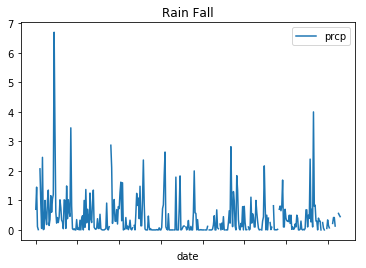

In [11]:
#Plot the precipitation over the last 12 months.

rain_2017_df.plot()

#Set plot title.
plt.title("Rain Fall")

#Save graph.
plt.savefig("Rain Fall")

#Show graph.

plt.show()

In [12]:

#Total precipitation over the last 12 months.#Total p 

rain_total = rain_2017_df["prcp"].sum()
rain_total

149.07

In [13]:
#Display a statistical overview of the rainfall over the past 12 months.

rain_stats = rain_2017_df.describe()
rain_stats


,prcp
count,345.000000
mean,0.432087
std,0.704363
min,0.000000
25%,0.010000
50%,0.140000
75%,0.580000
max,6.700000


In [14]:
# Set stations_first as a variable.

stations_first = session.query(Stations).first()
stations_first

In [15]:

#Show the first row of the stations table.#Show th 

stations_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1120a5518>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [16]:
#Calculate the total number of stations.

total_stations = session.query(Stations.station).count()
total_stations

9

In [17]:
#Find the most active stations.

active_station = session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
        
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
most_active = active_station[0][0]
most_active

'USC00519281'

In [25]:
tobs = session.query(Measurements.tobs).filter(Measurements.date >= "2016-07-28", Measurements.station == most_active).all()
       
tobs

[(81.0),
 (80.0),
 (77.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (81.0),
 (78.0),
 (78.0),
 (81.0),
 (81.0),
 (82.0),
 (80.0),
 (76.0),
 (80.0),
 (76.0),
 (75.0),
 (74.0),
 (82.0),
 (80.0),
 (79.0),
 (81.0),
 (79.0),
 (78.0),
 (77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 

In [26]:
tobs_df = pd.DataFrame(tobs)
tobs_df.head()

,tobs
0,81.0
1,80.0
2,77.0
3,75.0
4,76.0


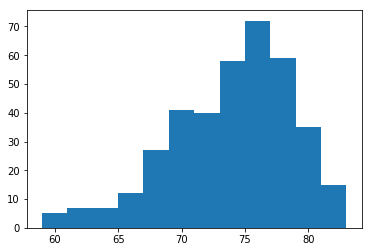

In [27]:
plt.hist(tobs_df["tobs"], bins=12)

plt.show()

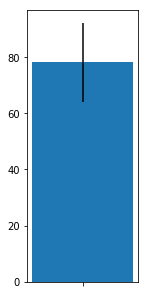

In [28]:
def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date >= start_date,\
         Measurements.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
calc_temps("2017-07-05", "2017-07-18")